In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely import affinity
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
gdf = gpd.read_file('../data/na_lakes/hydrography_p_lakes_v2/hydrography_p_lakes_v2.shp')

In [3]:
gdf.crs

<Projected CRS: PROJCS["Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Ar ...>
Name: Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Area
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: Sphere_ARC_INFO
- Ellipsoid: Sphere_ARC_INFO
- Prime Meridian: Greenwich

In [4]:
gdf = gdf.to_crs(epsg=3857)
gdf = gdf.dropna()

In [5]:
gdf[gdf['NAMEEN'].str.contains('Cayuga')]

,OBJECTID,UIDENT,TYPE,COUNTRY,NAMEEN,NAMEFR,NAMESP,EDIT_DATE,EDIT,Shape_Leng,Shape_Area,geometry
1723,1724,304102,16,USA,Cayuga Lake,Cayuga Lake,Cayuga Lake,20060803,NEW,121524.695663,1.738421e+08,"POLYGON ((-8516745.109 5233131.893, -8518104.7..."


In [6]:
lake_bounds = gdf[gdf['NAMEEN'].str.contains('Cayuga')]['geometry'].unary_union
# lake_bounds = affinity.scale(lake_bounds, xfact=1.5, yfact=1)
# lake_bounds = affinity.translate(lake_bounds, xoff=3000.0, yoff=0)
# lake_bounds = affinity.rotate(lake_bounds, xoff=3000.0, yoff=0)

In [7]:
from pyproj import Transformer

def get_state_bounds(abbr):
    # get bounds for state and convert to epsg:3857
    usa = gpd.read_file('../data/states_21basic/states.shp')

    state_bounds = usa[usa.STATE_ABBR == abbr].total_bounds.reshape((2, 2))

    transformer = Transformer.from_crs("epsg:4326", "epsg:3857")

    state_bounds[0] = transformer.transform(state_bounds[0,1]-0.1, state_bounds[0,0]-0.1)
    state_bounds[1] = transformer.transform(state_bounds[1,1]+0.1, state_bounds[1,0]+0.1)
    
    return state_bounds

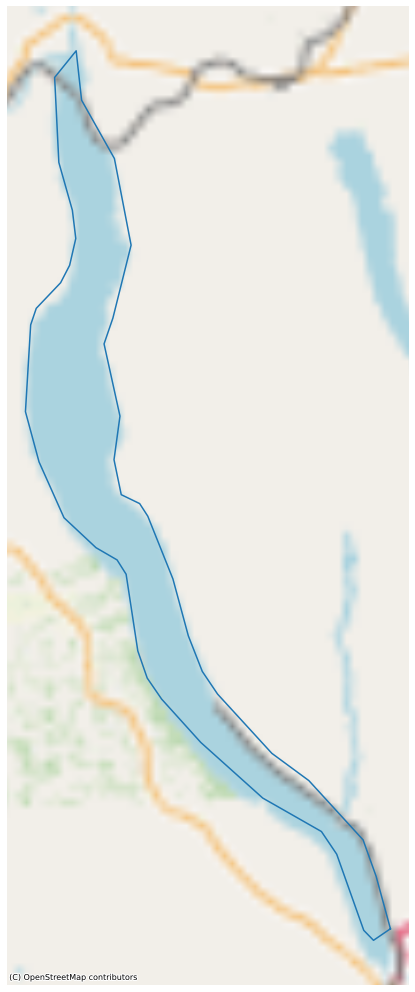

In [8]:
# ax = gdf[gdf['NAMEEN'].str.contains('Seneca')].plot(
#     figsize=(18, 18), 
#     label='Seneca Lake',
# )

fig= plt.figure(figsize=(18, 18))

ax = plt.plot(*lake_bounds.exterior.xy)
ax = plt.gca()

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=8)
ax.set_axis_off()

In [9]:
nh_lakes = gpd.read_file('../data/na_lakes/NH Water Bodies/NH Water Bodies.shp')

In [10]:
nh_lakes = nh_lakes.to_crs(epsg=3857)
nh_lakes = nh_lakes.dropna()

In [11]:
nh_lakes.head()

,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,ReachCode,FType,FCode,Visibility,Shape_Leng,Shape_Area,geometry
60,106453099,2003-10-07,2,00575288,Shagg Pond,0.225000,0.0,01040002000972,390,39004,500000,0.023885,0.000025,"POLYGON Z ((-7851078.329 5531479.439 0.000, -7..."
62,106453263,2013-02-22,2,00561858,Bear Pond,1.326224,0.0,01040002000975,390,39004,2000000,0.083199,0.000150,"POLYGON Z ((-7824470.173 5519652.782 0.000, -7..."
64,106453653,2003-10-07,2,00871800,Dream Lake,0.042000,0.0,01040002006526,390,39004,250000,0.013021,0.000005,"POLYGON Z ((-7914601.171 5533909.522 0.000, -7..."
70,106454175,2003-10-07,2,00574869,Sandy Bottom Pond,0.079000,0.0,01040002001019,390,39004,250000,0.013617,0.000009,"POLYGON Z ((-7821394.720 5499612.499 0.000, -7..."
74,106454763,2003-10-07,2,00564678,Curtis Bog,0.263000,0.0,01040002001053,390,39004,500000,0.096481,0.000030,"POLYGON Z ((-7796101.047 5484140.290 0.000, -7..."


In [12]:
len(nh_lakes)

2311

In [13]:
len(nh_lakes['GNIS_ID'].unique())

2192

In [14]:
len(nh_lakes['GNIS_Name'].unique())

1726

In [15]:
nh_lakes[nh_lakes['GNIS_Name'].str.contains('Wentworth')]

,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,ReachCode,FType,FCode,Visibility,Shape_Leng,Shape_Area,geometry
28874,107204699,2003-10-10,2,01774771,Wentworth Pond,0.028,0.0,01070002004279,390,39004,2000000,0.009741,0.000003,"POLYGON Z ((-7929325.571 5381948.840 0.000, -7..."
42064,107204271,2009-09-10,2,00870737,Lake Wentworth,12.532,162.8,01070002002847,390,39009,5000000,0.361990,0.001397,"POLYGON Z ((-7925056.825 5404125.051 0.000, -7..."


In [16]:
nh_lakes[nh_lakes['GNIS_ID'] == '00872720']

,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,ReachCode,FType,FCode,Visibility,Shape_Leng,Shape_Area,geometry
37370,92797659,2003-08-04,2,00872720,Squam Lake,27.483,171.0,01070001001182,390,39009,5000000,1.315736,0.003071,"POLYGON Z ((-7956696.785 5431455.724 0.000, -7..."


In [17]:
sunapee_lake = nh_lakes[nh_lakes['GNIS_Name'] == 'Sunapee Lake']
sunapee_lake

,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,ReachCode,FType,FCode,Visibility,Shape_Leng,Shape_Area,geometry
17286,120804340,2014-12-11,2,00871340,Sunapee Lake,16.694197,333.0,01080106002001,390,39009,5000000,0.555862,0.001854,"POLYGON Z ((-8023421.732 5367845.970 0.000, -8..."


In [18]:
lake_bounds = sunapee_lake['geometry'].unary_union

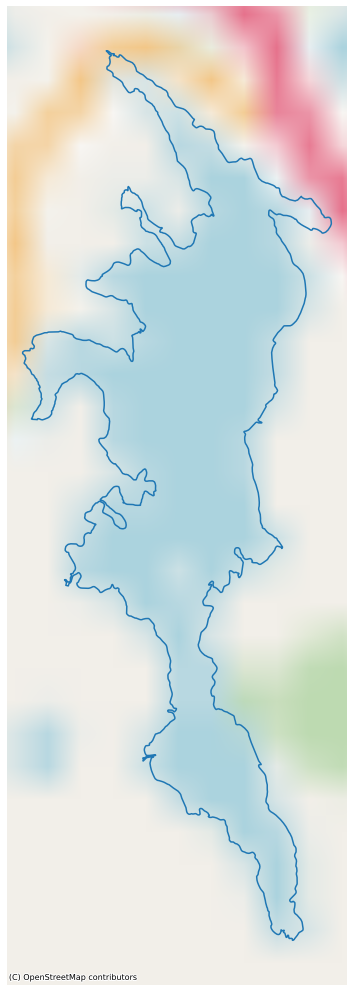

In [19]:
fig= plt.figure(figsize=(18, 18))

ax = plt.plot(*lake_bounds.exterior.xy)
ax = plt.gca()

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=8)
ax.set_axis_off()